Pandas: 

    -unlike numpy, pandas specializes in dealing with tabular data composed of mixed data types
    
    -Series (one dimensional, labeled array): 
        -> has 2 properties that show labels and data 
        values - actual data in Series 
        index - labels for data in Series
        
    -DataFrame (2 dimensional data structure - rows and columns)
    
    -Index (type that holds the labels of a Series and Dataframe)
    
    -obvious different from numpy is that it has index labels (that it can be repeated)
    
    -it supports different types in its values

Without index specified, labels are simply 0 to length of values - 1

In [2]:
import numpy as np
import pandas as pd

In [7]:
#an ndarray
pd.Series(np.array([7,8,9]))

0    7
1    8
2    9
dtype: int64

In [8]:
#a list 
pd.Series(['ant', 'bat', 'cat'])

0    ant
1    bat
2    cat
dtype: object

In [9]:
pd.Series(['ant','ant',12])

0    ant
1    ant
2     12
dtype: object

In [10]:
#Specifying Labels 
pd.Series(['Hoboken', 'Itaca'], ['NJ', 'NY'])

NJ    Hoboken
NY      Itaca
dtype: object

In [11]:
#With arguments 
pd.Series(data =[7,8])

0    7
1    8
dtype: int64

In [12]:
pd.Series(data=[7,8], index = ['A','B'])

A    7
B    8
dtype: int64

In [14]:
#len(data) == len(index)
##pd.Series([7,8,9], index = ['A','B'])
##value error

In [16]:
pd.Series({'B':'bat', 'A': 'ant'})

B    bat
A    ant
dtype: object

In [22]:
#dict with index 
pd.Series({'A':'ant', 'B': 'bat'}, ['A','C'])

A    ant
C    NaN
dtype: object

In [23]:
s = pd.Series({'x': 100}, ['x', 'y'])

In [24]:
pd.isnull(s) # or s.isnull()

x    False
y     True
dtype: bool

In [25]:
pd.notnull(s) # or s.notnull()

x     True
y    False
dtype: bool

In [26]:
#index and value 
s = pd.Series([7, 8, 9], ['x', 'y', 'z'])

In [27]:
s.values

array([7, 8, 9])

In [28]:
s.index

Index(['x', 'y', 'z'], dtype='object')

In [29]:
s = pd.Series([7, 8, 9, 10], list('xyxz'))
s['y'] # 8 ... (as expected)

8

In [30]:
s[['y', 'z']] #  Series! y     8

y     8
z    10
dtype: int64

In [31]:
s[['y', 'y', 'z']]

y     8
y     8
z    10
dtype: int64

In [32]:
s = pd.Series([7, 8, 9, 10], list('xyxz'))

In [33]:
s['x'] #  Series! x     7


x    7
x    9
dtype: int64

In [34]:
#Vectorized Arithmetic 
s = pd.Series([1, 2], ['x', 'y'])

In [35]:
s-2

x   -1
y    0
dtype: int64

In [36]:
##Tricky Label Alignment
s = pd.Series([1, 2], ['x', 'y'])
s + pd.Series([9, 100], ['x', 'z']) # tricky!

x    10.0
y     NaN
z     NaN
dtype: float64

In [37]:
#Comparsion Operations 
s = pd.Series([1, 2], ['x', 'y'])
s ==1

x     True
y    False
dtype: bool

In [38]:
s  == pd.Series([1, 2], ['x', 'y'])

x    True
y    True
dtype: bool

In [40]:
#Filtering with booleans 
s = pd.Series([2, 3, 4, 5])
s[[True, False, True, False]]	

0    2
2    4
dtype: int64

*** DATAFRAMES ***

In [42]:
pd.DataFrame([[1, 2, 3], [4, 5, 6]])

,0,1,2
0,1,2,3
1,4,5,6


In [43]:
pd.DataFrame([[1, 2, 3], [4, 5, 6]], ['r1', 'r2'])

,0,1,2
r1,1,2,3
r2,4,5,6


In [48]:
d = pd.DataFrame({
    "colA": {'r1': 6, 'r2': 7},
    "colB": {'r1': 8, 'r2': 9}
})

In [49]:
d

,colA,colB
r1,6,8
r2,7,9


In [106]:
pd.DataFrame([[1, 2, 3], [4, 5, 6]], 
    columns=['A', 'B', 'C'])

,A,B,C
0,1,2,3
1,4,5,6


In [55]:
df = pd.DataFrame([[4, 5, 6], [7, 8, 9]],
    columns=['foo', 'bar', 'baz'])

df

,foo,bar,baz
0,4,5,6
1,7,8,9


In [54]:
df['foo']

0    4
1    7
Name: foo, dtype: int64

In [56]:
type(df['foo'])

pandas.core.series.Series

In [57]:
df[['foo', 'bar']]

,foo,bar
0,4,5
1,7,8


In [58]:
type(df[['foo', 'bar']])

pandas.core.frame.DataFrame

In [59]:
type(df[['foo']])  

pandas.core.frame.DataFrame

In [61]:
#Indexing with list of booleans /arrays 
d = pd.DataFrame({"cA": {'r1': 1, 'r2': 2, 'r3': 3},
                  "cB": {'r1': 4, 'r2': 5, 'r3': 6},
                  "cC": {'r1': 7, 'r2': 8, 'r3': 9}})

In [62]:
d[[False, True, True]] 

,cA,cB,cC
r2,2,5,8
r3,3,6,9


In [65]:
d[d['cA'] > 1]

,cA,cB,cC
r2,2,5,8
r3,3,6,9


In [66]:
df = pd.DataFrame([[4, 5, 6], [7, 8, 9]],
    columns=['foo', 'bar', 'baz'])

df.drop('baz', axis=1)

,foo,bar
0,4,5
1,7,8


In [67]:
df = pd.DataFrame([[4, 5, 6], [7, 8, 9]],
	columns=['foo', 'bar', 'baz'])

In [68]:
df.loc[1]

foo    7
bar    8
baz    9
Name: 1, dtype: int64

In [80]:
data = [["$229.2", 2017, 123000, "$1100", "Cupertino, US"],
     ["$211.9", 2017, 320671, "$284", "Suwon, South Korea"],
     ["$177.8", 2017, 566000, "$985",  "Seattle, US"],
     ["$154.7", 2017, 1300000, "$66", "New Taipei City, Taiwan"],
     ["$110.8", 2017, 80110, "$834", "Mountain View, US"]]

comps = ["apple", "samsung", "amazon", "foxconn", "alphabet"]
cols = ["revenue", "fy", "employees", "mcap", "location"]

c = pd.DataFrame(data, index=comps, columns=cols)

In [81]:
c

,revenue,fy,employees,mcap,location
apple,$229.2,2017,123000,$1100,"Cupertino, US"
samsung,$211.9,2017,320671,$284,"Suwon, South Korea"
amazon,$177.8,2017,566000,$985,"Seattle, US"
foxconn,$154.7,2017,1300000,$66,"New Taipei City, Taiwan"
alphabet,$110.8,2017,80110,$834,"Mountain View, US"


In [94]:
c[0:3][['revenue','location']]

,revenue,location
apple,$229.2,"Cupertino, US"
samsung,$211.9,"Suwon, South Korea"
amazon,$177.8,"Seattle, US"


In [95]:
c.index

Index(['apple', 'samsung', 'amazon', 'foxconn', 'alphabet'], dtype='object')

In [97]:
c['state'] = pd.Series({'apple': 'CA', 'amazon': 'SEA', 'alphabet': 'CA'})

In [98]:
c

,revenue,fy,employees,mcap,location,state
apple,$229.2,2017,123000,$1100,"Cupertino, US",CA
samsung,$211.9,2017,320671,$284,"Suwon, South Korea",NaN
amazon,$177.8,2017,566000,$985,"Seattle, US",SEA
foxconn,$154.7,2017,1300000,$66,"New Taipei City, Taiwan",NaN
alphabet,$110.8,2017,80110,$834,"Mountain View, US",CA


In [99]:
c[c['state'].isnull()]

,revenue,fy,employees,mcap,location,state
samsung,$211.9,2017,320671,$284,"Suwon, South Korea",NaN
foxconn,$154.7,2017,1300000,$66,"New Taipei City, Taiwan",NaN


In [100]:
c['state'] = c['state'].fillna('')

In [101]:
c

,revenue,fy,employees,mcap,location,state
apple,$229.2,2017,123000,$1100,"Cupertino, US",CA
samsung,$211.9,2017,320671,$284,"Suwon, South Korea",
amazon,$177.8,2017,566000,$985,"Seattle, US",SEA
foxconn,$154.7,2017,1300000,$66,"New Taipei City, Taiwan",
alphabet,$110.8,2017,80110,$834,"Mountain View, US",CA


In [102]:
c['country'] = c['location'].str.split(',').str[-1]

In [104]:
c

,revenue,fy,employees,mcap,location,state,country
apple,$229.2,2017,123000,$1100,"Cupertino, US",CA,US
samsung,$211.9,2017,320671,$284,"Suwon, South Korea",,South Korea
amazon,$177.8,2017,566000,$985,"Seattle, US",SEA,US
foxconn,$154.7,2017,1300000,$66,"New Taipei City, Taiwan",,Taiwan
alphabet,$110.8,2017,80110,$834,"Mountain View, US",CA,US


In [105]:
c.reindex(index=[*(list(c.index)[1:]), 'apple', 'microsoft'],
        columns=['revenue', 'employees', 'state', 'location'])

,revenue,employees,state,location
samsung,$211.9,320671.0,,"Suwon, South Korea"
amazon,$177.8,566000.0,SEA,"Seattle, US"
foxconn,$154.7,1300000.0,,"New Taipei City, Taiwan"
alphabet,$110.8,80110.0,CA,"Mountain View, US"
apple,$229.2,123000.0,CA,"Cupertino, US"
microsoft,NaN,NaN,NaN,NaN


In [455]:
data = [[104, "PUTNAM", 15, "Yes"],
     [197, "LEXINGTON", 3, "No"],
       ["NaN","LEXINGTON","n/a" , "No"],
       [201, "BERKELEY", 2, 12],
       [203, "BERKELEY", 3, "Yes"],
       [207, "BERKELEY", "NaN", "Yes"],
       ["NaN", "LEXINGTON", 2, "NaN"],
        [213, "TREMONT", -5, "Yes"],
        [217, "TREMONT", "na", "Yes"]]

cols = ['street_number', 'street_name', 'num_bedrooms', 'owner_occupied']

c = pd.DataFrame(data, columns=cols)

In [456]:
c.replace('NaN', np.NaN, inplace = True)

In [457]:
c

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15,Yes
1,197.0,LEXINGTON,3,No
2,NaN,LEXINGTON,n/a,No
3,201.0,BERKELEY,2,12
4,203.0,BERKELEY,3,Yes
5,207.0,BERKELEY,NaN,Yes
6,NaN,LEXINGTON,2,NaN
7,213.0,TREMONT,-5,Yes
8,217.0,TREMONT,na,Yes


In [458]:
c.dropna(inplace = True)

In [459]:
c

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15,Yes
1,197.0,LEXINGTON,3,No
3,201.0,BERKELEY,2,12
4,203.0,BERKELEY,3,Yes
7,213.0,TREMONT,-5,Yes
8,217.0,TREMONT,na,Yes


In [460]:
c.dtypes

street_number     float64
street_name        object
num_bedrooms       object
owner_occupied     object
dtype: object

In [461]:
c = c[c['num_bedrooms'].apply(lambda x: type(x) == int)]

In [462]:
c['num_bedrooms'] = c['num_bedrooms'].abs()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [463]:
c = c[c['owner_occupied'].apply(lambda x: type(x) != int)]

In [464]:
c

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15,Yes
1,197.0,LEXINGTON,3,No
4,203.0,BERKELEY,3,Yes
7,213.0,TREMONT,5,Yes


In [412]:
c

0    15
1     3
3     2
4     3
7     5
Name: num_bedrooms, dtype: int64

In [369]:
c

0    15
1     3
3     2
4     3
7     5
Name: num_bedrooms, dtype: int64

In [355]:
c = c[c['num_bedrooms'].apply(lambda x: x > 0)]

In [356]:
c

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15,Yes
1,197.0,LEXINGTON,3,No
3,201.0,BERKELEY,2,12
4,203.0,BERKELEY,3,Yes


In [465]:
new_names = {'street_number':'streetNum', 'street_name':'streetName', 'num_bedrooms': 'numBedrooms', 'owner_occupied': 'ownerOccupied'}

In [469]:
c.rename(columns=new_names, inplace = True)

In [470]:
c

,streetNum,streetName,numBedrooms,ownerOccupied
0,104.0,PUTNAM,15,Yes
1,197.0,LEXINGTON,3,No
4,203.0,BERKELEY,3,Yes
7,213.0,TREMONT,5,Yes


In [322]:
c.num_bedrooms.str.contains("na")

0     NaN
1     NaN
3     NaN
4     NaN
7     NaN
8    True
Name: num_bedrooms, dtype: object

In [ ]:
c.num_bedrooms[]

In [316]:
c[c.num_bedrooms.str.contains("na") == False]

,street_number,street_name,num_bedrooms,owner_occupied


In [304]:
new_c

,street_number,street_name,num_bedrooms,owner_occupied
8,217.0,TREMONT,na,Yes


In [236]:
c.iloc[2][0] = 'NaN'
c.iloc[2][2] = 'NaN'


In [237]:
c.replace('NaN', np.NaN, inplace = True)

In [246]:
c.dropna()

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15.0,Yes
1,197.0,LEXINGTON,3.0,No
3,201.0,LEXINGTON,2.0,12


In [244]:
c

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15.0,Yes
1,197.0,LEXINGTON,3.0,No
2,NaN,LEXINGTON,NaN,No
3,201.0,LEXINGTON,2.0,12


In [240]:
c

,street_number,street_name,num_bedrooms,owner_occupied
0,104.0,PUTNAM,15.0,Yes
1,197.0,LEXINGTON,3.0,No
2,NaN,LEXINGTON,NaN,No
3,201.0,LEXINGTON,2.0,12


In [221]:
c

0    104.0
1    197.0
3    201.0
Name: street_number, dtype: float64

In [180]:
c[c.street_number.apply(lambda x: x.isnumeric())]

AttributeError: 'int' object has no attribute 'isnumeric'

In [3]:
df = pd.DataFrame([[2,4,5],[6,7,8,]], columns = ['cA', 'cB', 'cC'])

In [4]:
df

,cA,cB,cC
0,2,4,5
1,6,7,8


In [7]:
df.loc[:, 'cA':'cC']

,cA,cB,cC
0,2,4,5
1,6,7,8


In [8]:
import matplotlib.pyplot as plt

In [10]:
x = [0, 1, 2, 3, 4]
y = [0, 2, 4, 9, 16]
x2 = [0, 1, 2, 3, 4]
y2 = [4, 5, 6, 7, 8]

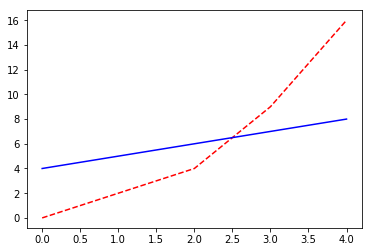

In [11]:
plt.plot(x, y, 'r--', x2, y2, 'b-')

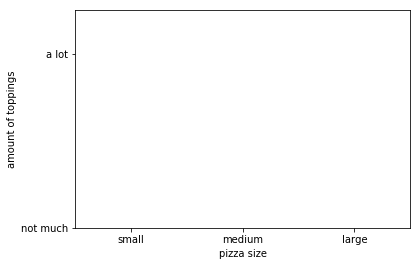

In [14]:
plt.xticks([0, 2, 4], ['small', 'medium', 'large'])
plt.yticks([0, 16], ['not much', 'a lot'])

plt.xlabel('pizza size')
plt.ylabel('amount of toppings')

plt.xlim(-1, 5)
plt.ylim(0, 20)

plt.show()

In [15]:
plt.show()

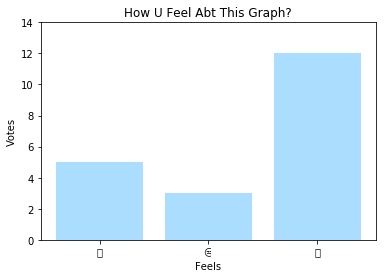

In [17]:
feels = ('👍', '😒', '🍠')

# y values
num_votes = [5, 3, 12]

# the x values (based on number of labels)
x = np.arange(len(feels))



plt.bar(x, num_votes, align='center', color='#aaddff')
plt.xticks(x, feels)
plt.ylim(0, 14)
plt.ylabel('Votes')
plt.xlabel('Feels')
plt.title('How U Feel Abt This Graph?')
plt.show()

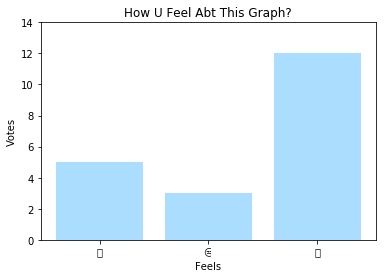

In [18]:
feels = {'👍': 5, '😒':3, '🍠':12}
plt.bar(np.arange(len(feels)), list(feels.values()), align='center', color='#aaddff')
plt.xticks(np.arange(len(feels)), list(feels.keys()))

plt.ylim(0, 14)
plt.ylabel('Votes')
plt.xlabel('Feels')
plt.title('How U Feel Abt This Graph?')
plt.show()

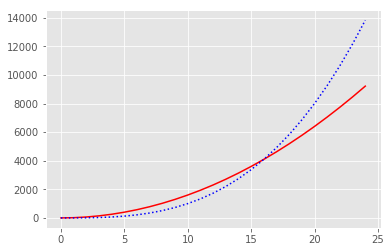

In [19]:
x = np.arange(0, 25)
y = (x * 4) ** 2
x2 = np.arange(0, 25)
y2 = x2 ** 3

plt.style.use('ggplot')
plt.plot(x, y, 'r-', x2, y2, 'b:')
plt.show()

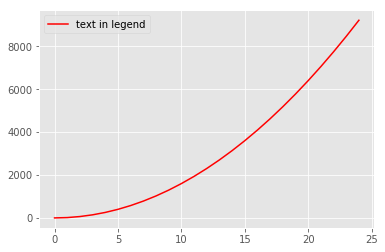

In [20]:
plt.plot(x, y, 'r-', label='text in legend')
plt.legend() # loc keyword arg for positioning
# upper right, lower right, upper center, etc.

In [21]:
x = np.arange(0, 25)
y = (x * 4) ** 2
x2 = np.arange(0, 25)
y2 = x2 ** 3

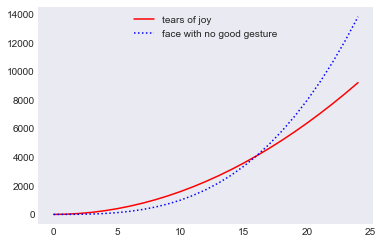

In [22]:
plt.style.use('seaborn-dark')
plt.plot(x, y, 'r-', label='tears of joy')
plt.plot(x2, y2, 'b:', label='face with no good gesture')
plt.legend(loc="upper center")
plt.show()

(-1.1129928321258653,
 1.1006187372479035,
 -1.1129928305354353,
 1.1006187062159731)

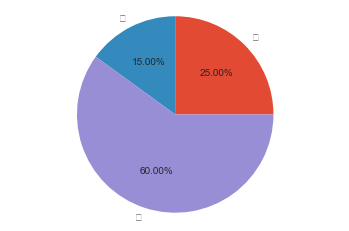

In [23]:
feels = {'👍': 5, '😒':3, '🍠':12}
plt.style.use('ggplot')
plt.pie(list(feels.values()), 
    labels=list(feels.keys()), 
    autopct='%.2f%%')
plt.axis('equal')

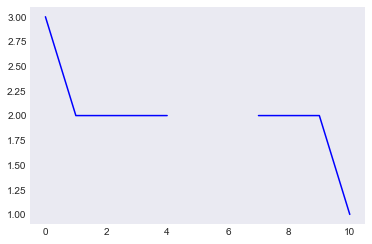

In [24]:
y = [3, 2, 2, 2, 2, np.nan, np.nan, 2, 2, 2, 1]
plt.style.use('seaborn-dark')
plt.plot(y, 'b-')
plt.show()

In [25]:
rain = pd.DataFrame([[3.50, 4.53, 4.13, 3.98],
                     [7.91, 5.98, 6.10, 5.12],
                     [3.94, 5.28, 3.90, 4.49],
                     [1.42, 0.63, 0.75, 1.65]],
    index=['New York', 'New Orleans', 'Atlanta', 'Seattle'],
    columns=['Jun', 'Jul', 'Aug', 'Sept'])

In [26]:
rain

,Jun,Jul,Aug,Sept
New York,3.50,4.53,4.13,3.98
New Orleans,7.91,5.98,6.10,5.12
Atlanta,3.94,5.28,3.90,4.49
Seattle,1.42,0.63,0.75,1.65


In [31]:
rain.apply(lambda month: sum(month), axis = 0)

Jun     16.77
Jul     16.42
Aug     14.88
Sept    15.24
dtype: float64